In [1]:
import pandas as pd
from string import ascii_letters
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm

import warnings
warnings.filterwarnings("ignore")

In [2]:
    df = pd.read_csv("C:\\Users\\Manish\\Car_sales (1).csv")
    df

,Manufacturer,Model,Sales_in_thousands,__year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor
0,Acura,Integra,16.919,16.360,Passenger,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2/2/2012,58.280150
1,Acura,TL,39.384,19.875,Passenger,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,6/3/2011,91.370778
2,Acura,CL,14.114,18.225,Passenger,NaN,3.2,225.0,106.9,70.6,192.0,3.470,17.2,26.0,1/4/2012,NaN
3,Acura,RL,8.588,29.725,Passenger,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,3/10/2011,91.389779
4,Audi,A4,20.397,22.255,Passenger,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,10/8/2011,62.777639
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152,Volvo,V40,3.545,NaN,Passenger,24.40,1.9,160.0,100.5,67.6,176.6,3.042,15.8,25.0,9/21/2011,66.498812
153,Volvo,S70,15.245,NaN,Passenger,27.50,2.4,168.0,104.9,69.3,185.9,3.208,17.9,25.0,11/24/2012,70.654495
154,Volvo,V70,17.531,NaN,Passenger,28.80,2.4,168.0,104.9,69.3,186.2,3.259,17.9,25.0,6/25/2011,71.155978
155,Volvo,C70,3.493,NaN,Passenger,45.50,2.3,236.0,104.9,71.5,185.7,3.601,18.5,23.0,4/26/2011,101.623357


In [3]:
df.drop_duplicates(keep= 'first',inplace= True)

In [4]:
df.isnull().sum()

Manufacturer            0
Model                   0
Sales_in_thousands      0
__year_resale_value    36
Vehicle_type            0
Price_in_thousands      2
Engine_size             1
Horsepower              1
Wheelbase               1
Width                   1
Length                  1
Curb_weight             2
Fuel_capacity           1
Fuel_efficiency         3
Latest_Launch           0
Power_perf_factor       2
dtype: int64

In [5]:
df["__year_resale_value"] = df["__year_resale_value"].fillna(df["__year_resale_value"].mean())
df["Price_in_thousands"] = df["Price_in_thousands"].fillna(df["Price_in_thousands"].mean())
df["Engine_size"] = df["Engine_size"].fillna(df["Engine_size"].mean())
df["Horsepower"] = df["Horsepower"].fillna(df["Horsepower"].mean())
df["Wheelbase"] = df["Wheelbase"].fillna(df["Wheelbase"].mean())
df["Width"] = df["Width"].fillna(df["Width"].mean())
df["Length"] = df["Length"].fillna(df["Length"].mean())
df["Curb_weight"] = df["Curb_weight"].fillna(df["Curb_weight"].mean())
df["Fuel_capacity"] = df["Fuel_capacity"].fillna(df["Fuel_capacity"].mean())
df["Power_perf_factor"] = df["Power_perf_factor"].fillna(df["Power_perf_factor"].mean())
df["Fuel_efficiency"] = df["Fuel_efficiency"].fillna(df["Fuel_efficiency"].mean())

In [6]:
df.isnull().sum()

Manufacturer           0
Model                  0
Sales_in_thousands     0
__year_resale_value    0
Vehicle_type           0
Price_in_thousands     0
Engine_size            0
Horsepower             0
Wheelbase              0
Width                  0
Length                 0
Curb_weight            0
Fuel_capacity          0
Fuel_efficiency        0
Latest_Launch          0
Power_perf_factor      0
dtype: int64

In [7]:
df['Latest_Launch']=pd.to_datetime(df['Latest_Launch'])

df['launch_year']=df['Latest_Launch'].dt.year
df['launch_month']=df['Latest_Launch'].dt.month
df.head()

,Manufacturer,Model,Sales_in_thousands,__year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor,launch_year,launch_month
0,Acura,Integra,16.919,16.360,Passenger,21.500000,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2012-02-02,58.280150,2012,2
1,Acura,TL,39.384,19.875,Passenger,28.400000,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,2011-06-03,91.370778,2011,6
2,Acura,CL,14.114,18.225,Passenger,27.390755,3.2,225.0,106.9,70.6,192.0,3.470,17.2,26.0,2012-01-04,77.043591,2012,1
3,Acura,RL,8.588,29.725,Passenger,42.000000,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,2011-03-10,91.389779,2011,3
4,Audi,A4,20.397,22.255,Passenger,23.990000,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,2011-10-08,62.777639,2011,10


In [8]:
#Creating another df in which only numeric values are there it will be used where numeric values are required

df2=df.drop(['Manufacturer','Vehicle_type','Latest_Launch','__year_resale_value'],axis=1)


In [9]:
#df2.head(2)

In [10]:

df=df.drop(['Model','Vehicle_type','Latest_Launch','__year_resale_value'],axis=1)
df.head()

,Manufacturer,Sales_in_thousands,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Power_perf_factor,launch_year,launch_month
0,Acura,16.919,21.500000,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,58.280150,2012,2
1,Acura,39.384,28.400000,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,91.370778,2011,6
2,Acura,14.114,27.390755,3.2,225.0,106.9,70.6,192.0,3.470,17.2,26.0,77.043591,2012,1
3,Acura,8.588,42.000000,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,91.389779,2011,3
4,Audi,20.397,23.990000,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,62.777639,2011,10


In [11]:
# standard scaler
df_num = df.select_dtypes('number')
std_scaler = StandardScaler()
df1 = std_scaler.fit_transform(df_num)
df1

std_scaler = StandardScaler()

std_scale = std_scaler.fit_transform(df_num)
std_scale

array([[-5.32042294e-01, -4.14436964e-01, -1.21476339e+00, ...,
        -7.53512870e-01,  8.98119783e-01, -1.29925956e+00],
       [-2.00760806e-01,  7.10042281e-02,  1.34013043e-01, ...,
         5.75359231e-01, -6.86203879e-01, -1.11581243e-01],
       [-5.73406398e-01, -1.24973447e-15,  1.34013043e-01, ...,
         0.00000000e+00,  8.98119783e-01, -1.59617914e+00],
       ...,
       [-5.23017399e-01,  9.91457465e-02, -6.36716346e-01, ...,
        -2.36438106e-01, -6.86203879e-01, -1.11581243e-01],
       [-7.30029620e-01,  1.27405414e+00, -7.33057520e-01, ...,
         9.87088101e-01, -6.86203879e-01, -7.05420400e-01],
       [-5.01811845e-01,  6.05693077e-01, -1.55010478e-01, ...,
         3.49060779e-01, -6.86203879e-01,  1.37301665e+00]])

### TASK - 1

### Silhouette Value

For n_clusters = 2 The average silhouette_score is : 0.2588123659067697
For n_clusters = 3 The average silhouette_score is : 0.2110187195540547
For n_clusters = 4 The average silhouette_score is : 0.21023997192631141
For n_clusters = 5 The average silhouette_score is : 0.14911414597525427
For n_clusters = 6 The average silhouette_score is : 0.14590222665054536


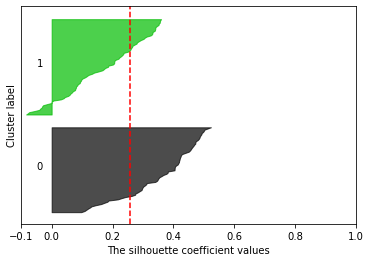

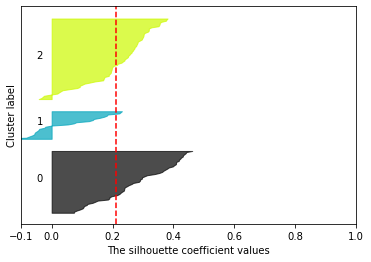

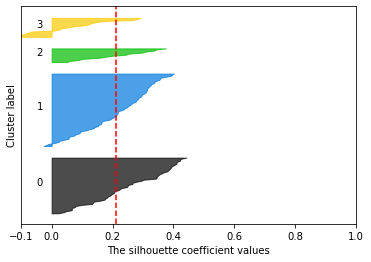

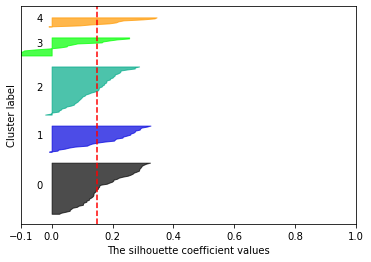

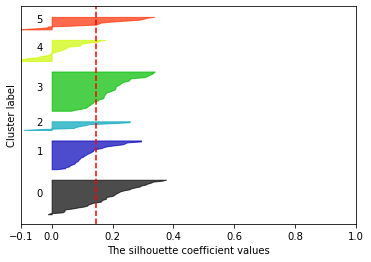

In [12]:
range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, ax1 = plt.subplots(1, 1)
    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(std_scale) + (n_clusters + 1) * 10])

    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(std_scale)

    silhouette_avg = silhouette_score(std_scale, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(std_scale, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")
    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

plt.show()

### n_clusters = 2 The average silhouette_score is he highest : 0.2588123659067697

### Elbow Method

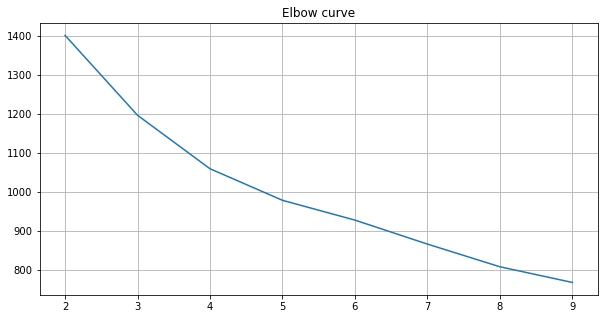

In [13]:
distorsions = []
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(std_scale)
    distorsions.append(kmeans.inertia_)

fig = plt.figure(figsize=(10, 5))
plt.plot(range(2, 10), distorsions)
plt.grid(True)
plt.title('Elbow curve');
plt.show()

### TASK - 2 

### Semantic Evaluation

In [14]:
from sklearn.cluster import KMeans

df3 = df_num[['Price_in_thousands','Fuel_efficiency']]
kmeans = KMeans(n_clusters=2,n_init=3).fit(df3)
centroids = kmeans.cluster_centers_
print(centroids)

[[21.34273585 24.58969486]
 [49.27035294 21.14705882]]


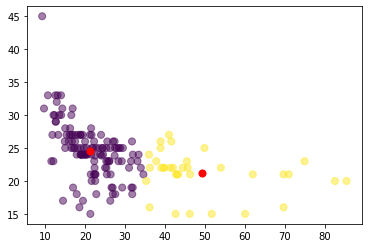

In [15]:
plt.scatter(df3['Price_in_thousands'], df3['Fuel_efficiency'], c= kmeans.labels_.astype(float), s=50, alpha=0.5)

plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50)
plt.show()

In [16]:
from sklearn.cluster import KMeans

df3 = df_num[['Price_in_thousands','Fuel_efficiency']]
kmeans = KMeans(n_clusters=3,n_init=3).fit(df3)
centroids1 = kmeans.cluster_centers_
print(centroids)

[[21.34273585 24.58969486]
 [49.27035294 21.14705882]]


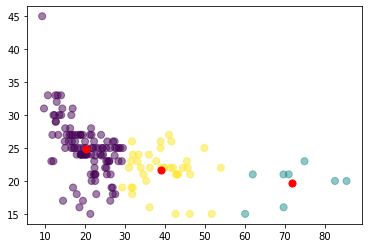

In [17]:
plt.scatter(df3['Price_in_thousands'], df3['Fuel_efficiency'], c= kmeans.labels_.astype(float), s=50, alpha=0.5)

plt.scatter(centroids1[:, 0], centroids1[:, 1], c='red', s=50)
plt.show()

In [18]:
from sklearn.cluster import KMeans

df3 = df_num[['Price_in_thousands','Fuel_efficiency']]
kmeans = KMeans(n_clusters=4,n_init=3).fit(df3)
centroids2 = kmeans.cluster_centers_
print(centroids)

[[21.34273585 24.58969486]
 [49.27035294 21.14705882]]


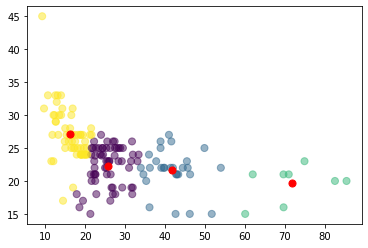

In [19]:
plt.scatter(df3['Price_in_thousands'], df3['Fuel_efficiency'], c= kmeans.labels_.astype(float), s=50, alpha=0.5)

plt.scatter(centroids2[:, 0], centroids2[:, 1], c='red', s=50)
plt.show()

In [20]:
from sklearn.cluster import KMeans

df3 = df_num[['Price_in_thousands','Fuel_efficiency']]
kmeans = KMeans(n_clusters=5,n_init=3).fit(df3)
centroids3 = kmeans.cluster_centers_
print(centroids)

[[21.34273585 24.58969486]
 [49.27035294 21.14705882]]


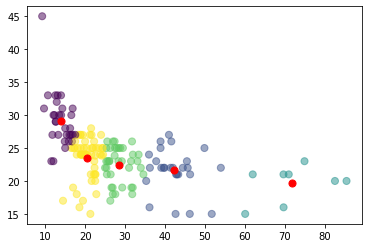

In [21]:
plt.scatter(df3['Price_in_thousands'], df3['Fuel_efficiency'], c= kmeans.labels_.astype(float), s=50, alpha=0.5)

plt.scatter(centroids3[:, 0], centroids3[:, 1], c='red', s=50)
plt.show()

In [23]:
clusterer = KMeans(n_clusters=3, random_state=10)
cluster_labels = clusterer.fit_predict(df3)

df2['cluster'] = cluster_labels
df2

,Model,Sales_in_thousands,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Power_perf_factor,launch_year,launch_month,cluster
0,Integra,16.919,21.500000,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,58.280150,2012,2,1
1,TL,39.384,28.400000,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,91.370778,2011,6,1
2,CL,14.114,27.390755,3.2,225.0,106.9,70.6,192.0,3.470,17.2,26.0,77.043591,2012,1,1
3,RL,8.588,42.000000,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,91.389779,2011,3,0
4,A4,20.397,23.990000,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,62.777639,2011,10,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152,V40,3.545,24.400000,1.9,160.0,100.5,67.6,176.6,3.042,15.8,25.0,66.498812,2011,9,1
153,S70,15.245,27.500000,2.4,168.0,104.9,69.3,185.9,3.208,17.9,25.0,70.654495,2012,11,1
154,V70,17.531,28.800000,2.4,168.0,104.9,69.3,186.2,3.259,17.9,25.0,71.155978,2011,6,1
155,C70,3.493,45.500000,2.3,236.0,104.9,71.5,185.7,3.601,18.5,23.0,101.623357,2011,4,0


In [24]:
for cluster in df.cluster.unique():
    print(cluster)
  
    print(df2[df2.cluster == cluster].Model.unique())

1
['Integra' 'TL' 'CL' 'A4' '323i' 'Century' 'Regal' 'LeSabre' 'Cavalier'
 'Malibu' 'Lumina' 'Monte Carlo' 'Camaro' 'Prizm' 'Metro' 'Impala'
 'Sebring Coupe' 'Sebring Conv.' 'Concorde' 'Cirrus' 'LHS'
 'Town & Country' '300M' 'Neon' 'Avenger' 'Stratus' 'Intrepid'
 'Ram Pickup' 'Ram Wagon' 'Ram Van' 'Dakota' 'Durango' 'Caravan' 'Escort'
 'Mustang' 'Contour' 'Taurus' 'Focus' 'Crown Victoria' 'Windstar' 'Ranger'
 'F-Series' 'Civic' 'Accord' 'CR-V' 'Passport' 'Odyssey' 'Accent'
 'Elantra' 'Sonata' 'I30' 'Wrangler' 'Cherokee' 'Grand Cherokee' 'Mirage'
 'Eclipse' 'Galant' 'Diamante' '3000GT' 'Montero Sport' 'Mystique'
 'Cougar' 'Sable' 'Grand Marquis' 'Mountaineer' 'Villager' 'Sentra'
 'Altima' 'Maxima' 'Quest' 'Xterra' 'Frontier' 'Cutlass' 'Intrigue'
 'Alero' 'Silhouette' 'Breeze' 'Voyager' 'Sunfire' 'Grand Am' 'Firebird'
 'Grand Prix' 'Bonneville' 'Montana' '3-Sep' 'SL' 'SC' 'SW' 'LW' 'LS'
 'Outback' 'Forester' 'Corolla' 'Camry' 'Avalon' 'Celica' 'Tacoma'
 'Sienna' 'RAV4' '4Runner' 'Golf' '

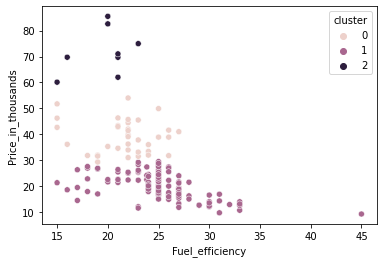

In [25]:
sns.scatterplot(data=df2, x=df2["Fuel_efficiency"], y=df2["Price_in_thousands"], hue=df2['cluster'])
plt.show()